In [23]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

def meshtest(darray):
    """This demonstrates the bug in pcolormesh.
    Define bmap with lat_0 = +90 and both plots are the same.  Define it
    with lat_0 = -90 and pcolor creates the expected result but pcolormesh
    does not.
    """
    plt.gcf()
    dpi = 100
    x_pixels = 360
    y_pixels = 180

    fig_x_inches = x_pixels / float(dpi)
    fig_y_inches = y_pixels / float(dpi)

    # Create the default figure at the right dimensions
    fig = plt.figure(figsize=(fig_x_inches, fig_y_inches), dpi=dpi)

    bmap = Basemap(projection='ortho', lat_0=-90, lon_0=-90, resolution='c')
    this_cmap = plt.get_cmap('PiYG')
    lon_array = np.linspace(-180., 170., darray.shape[0])
    lat_array = np.linspace(-90, 80., darray.shape[1])

    lats, lons = np.meshgrid(lat_array, lon_array)
    xx, yy = bmap(lons, lats)
    bmap.pcolormesh(xx, yy, darray, vmin=1.0, vmax=14.0, cmap=this_cmap,
                    alpha=1.0)
    # fig.savefig('pcolormesh.png', dpi=dpi, transparent=1.0)
    
    plt.figure()

    bmap.pcolor(lons, lats, darray, vmin=1.0, vmax=14.0, cmap=this_cmap,
                alpha=1.0, latlon=True)
    # fig.savefig('pcolor.png', dpi=dpi, transparent=1.0)

    # plt.clf()  # clear the plot in case anything is cached
    # plt.close('all')

    return

def make_data():
    """Make a highly colorful 2D image.  I'm sure there's a more pythonic
    way to do this but it works."""
    nrows = 180
    ncols = 360
    square_size = 20
    square_len = square_size**2
    nsquares = (nrows * ncols) // square_len
    darray = np.zeros((nrows, ncols))

    for square in range(nsquares):
        k = np.random.randint(16)
        nrow = square_size * int((square_size * square) / nrows)
        ncol = (square_size * square) % nrows
        darray[ncol:ncol + square_size, nrow:nrow + square_size] = k
    return darray

def main():
    darray = make_data()
    meshtest(darray)
    return


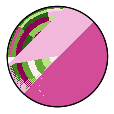

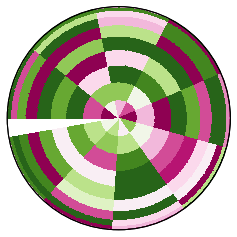

In [24]:
main()